In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

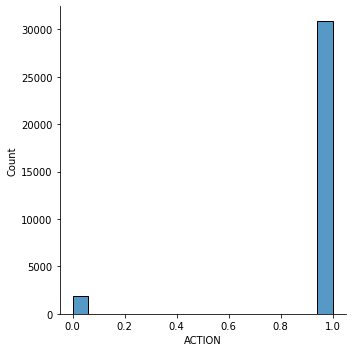

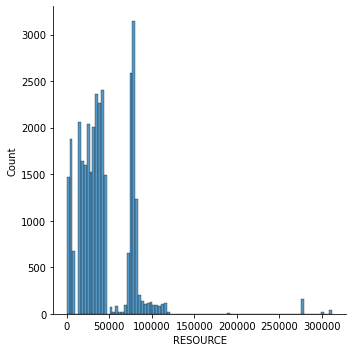

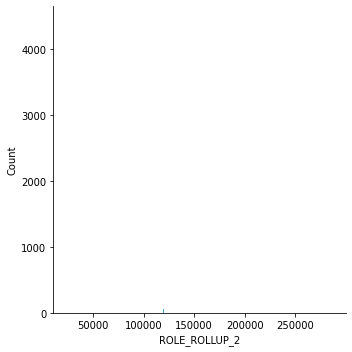

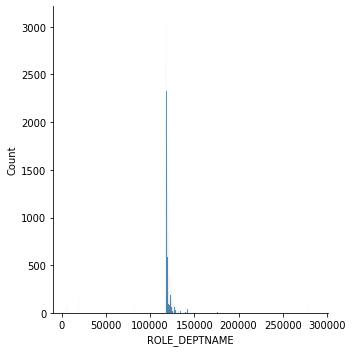

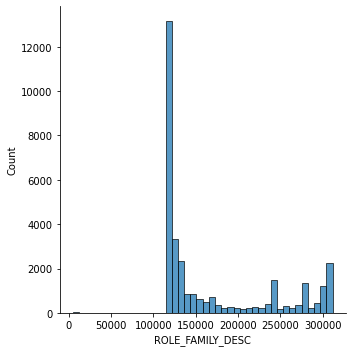

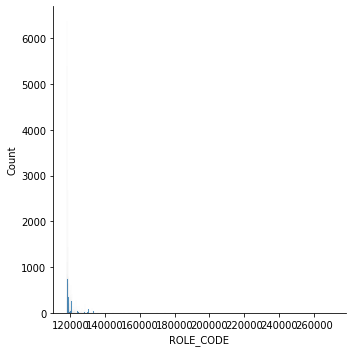

In [3]:
import seaborn as sns
for i in range(df_train.columns.size):
    sns.displot(df_train.iloc[:,i])

In [4]:
x = df_train.drop('ACTION',axis=1)      #input features
y = df_train['ACTION']                  #output label

In [5]:
test_input = df_test.drop('id',axis=1)      #test input containing features
test_input.head()

RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  ROLE_TITLE  \
0     78766   72734         118079         118080         117878      117879   
1     40644    4378         117961         118327         118507      118863   
2     75443    2395         117961         118300         119488      118172   
3     43219   19986         117961         118225         118403      120773   
4     42093   50015         117961         118343         119598      118422   

   ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0            118177        19721     117880  
1            122008       118398     118865  
2            301534       249618     118175  
3            136187       118960     120774  
4            300136       118424     118425

In [46]:
from sklearn.model_selection import train_test_split
#splitting in 20:80 for validation of data
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2,random_state=1)

In [47]:
from catboost import CatBoostClassifier                 #using catboost because its fast and doesnt require pre-processing
from sklearn.metrics import f1_score

In [106]:
cat_features = list(range(x_train.columns.size))        #classified features on which our model will train

model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric="AUC",
    random_seed=1,
    cat_features = cat_features
)

model.fit(x_train,y_train,eval_set=(x_valid,y_valid),use_best_model=True)

Learning rate set to 0.071005
0:	test: 0.5090082	best: 0.5090082 (0)	total: 48.9ms	remaining: 48.9s
1:	test: 0.5227460	best: 0.5227460 (1)	total: 83.6ms	remaining: 41.7s
2:	test: 0.5189773	best: 0.5227460 (1)	total: 117ms	remaining: 38.8s
3:	test: 0.5880238	best: 0.5880238 (3)	total: 145ms	remaining: 36.2s
4:	test: 0.6030701	best: 0.6030701 (4)	total: 170ms	remaining: 33.8s
5:	test: 0.6461160	best: 0.6461160 (5)	total: 214ms	remaining: 35.4s
6:	test: 0.6503420	best: 0.6503420 (6)	total: 254ms	remaining: 36s
7:	test: 0.6507273	best: 0.6507273 (7)	total: 294ms	remaining: 36.5s
8:	test: 0.6490571	best: 0.6507273 (7)	total: 362ms	remaining: 39.9s
9:	test: 0.6490571	best: 0.6507273 (7)	total: 373ms	remaining: 36.9s
10:	test: 0.6754816	best: 0.6754816 (10)	total: 390ms	remaining: 35.1s
11:	test: 0.7666761	best: 0.7666761 (11)	total: 436ms	remaining: 35.9s
12:	test: 0.7697771	best: 0.7697771 (12)	total: 502ms	remaining: 38.1s
13:	test: 0.7779961	best: 0.7779961 (13)	total: 536ms	remaining: 37

In [107]:
f1_score(y_valid,model.predict(x_valid))

0.9781708094327597

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,model.predict(x_valid))

0.958193469636863

<BarContainer object of 9 artists>

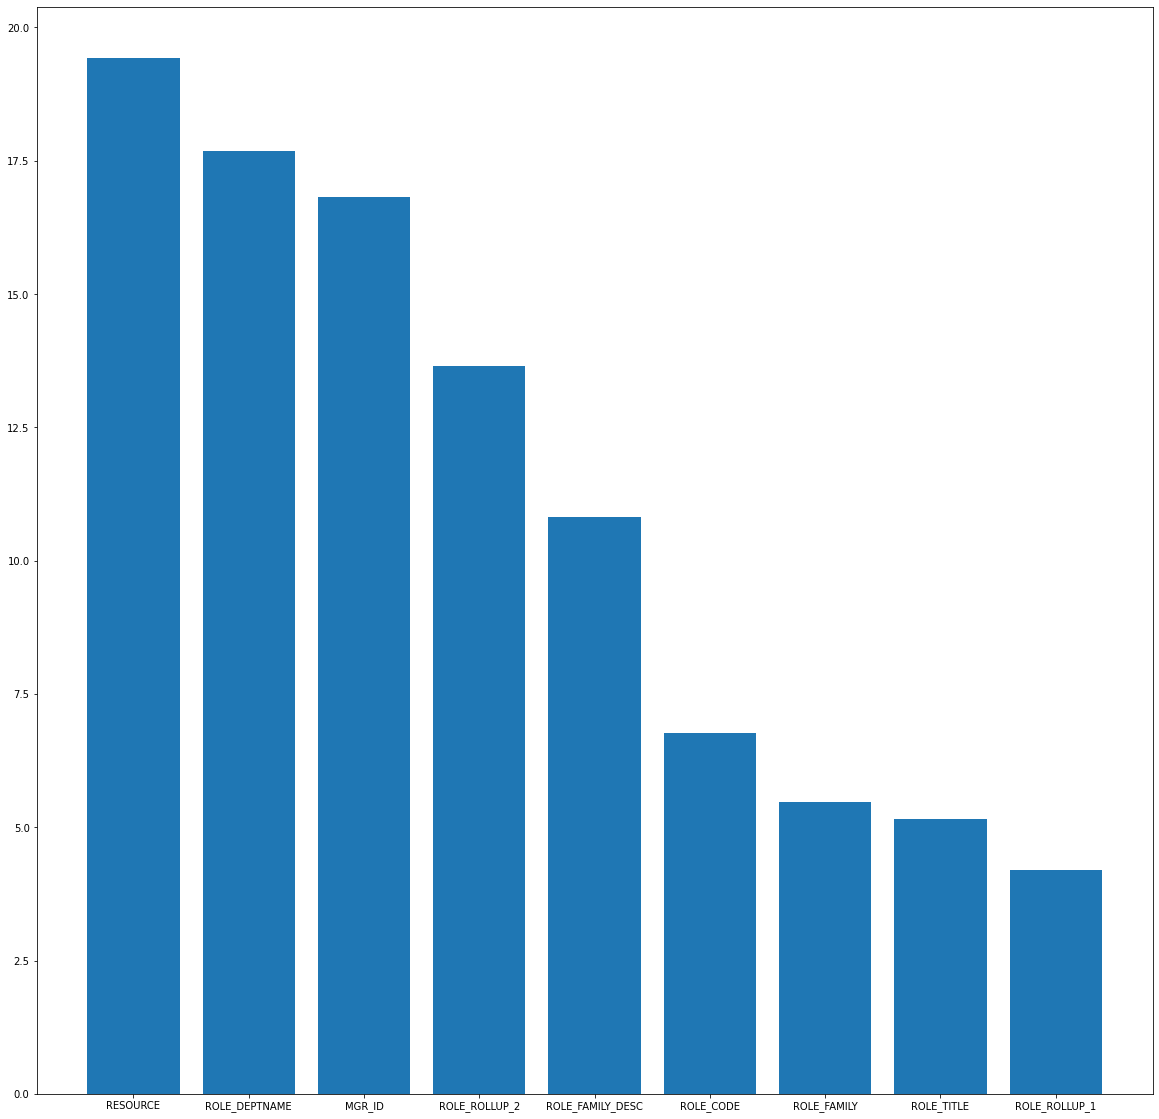

In [109]:
importance = model.get_feature_importance(prettified=True)
fig = plt.figure(figsize=(20,20))
plt.bar(importance['Feature Id'],importance['Importances'])

In [110]:
predictions = model.predict(test_input)

In [111]:
result = pd.DataFrame({'Id':df_test['id'],'Action':predictions})
result.to_csv('Submission6.csv',index=False)
